In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline

SAMPLE_NUMBER = 213

import os
import time

## ODMR at different amplitudes

ODMR = Optically detected magnetic resonance.

Here we're measuring all kinds of things at many different amplitudes of applied voltage. We do this to see if expectations match reality.

Notes:
- There's no voltage applied on the electrodes
- We're only applying a microwave to perform ODMR measurements

In [10]:
def read_filename(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Freqency (MHz)', 'PL (Counts/s)', '']
	df = df[['Freqency (MHz)', 'PL (Counts/s)']]

	# convert column values to float
	df['Freqency (MHz)'] = df['Freqency (MHz)'].astype(float)
	df['PL (Counts/s)'] = df['PL (Counts/s)'].astype(float)

	return df

In [11]:
# read out interesting files
df_535nm_2p45mW_OMDR_0p3V = read_filename("./MW-PL/NV_9h00/ODMR_ODMR_AT_DIFF_AMPLITUDE/535-2.45mW-ODMR-0V-0.3V-5.txt")
df_535nm_2p45mW_OMDR_0p4V = read_filename("./MW-PL/NV_9h00/ODMR_ODMR_AT_DIFF_AMPLITUDE/535-2.45mW-ODMR-0V-0.4V-6.txt")
df_535nm_2p45mW_OMDR_0p5V = read_filename("./MW-PL/NV_9h00/ODMR_ODMR_AT_DIFF_AMPLITUDE/535-2.45mW-ODMR-0V-0.5V-4.txt")

# add amplitude counting
df_535nm_2p45mW_OMDR_0p3V['Microwave Amp (V)'] = 0.3
df_535nm_2p45mW_OMDR_0p4V['Microwave Amp (V)'] = 0.4
df_535nm_2p45mW_OMDR_0p5V['Microwave Amp (V)'] = 0.5

# group all filenames together
dfs_535nm_2p45mW_ODMR_VAR_AMP = [
	df_535nm_2p45mW_OMDR_0p3V,
	df_535nm_2p45mW_OMDR_0p4V,
	df_535nm_2p45mW_OMDR_0p5V
]

# assign wavelength to obtained laser wavelength
for df in dfs_535nm_2p45mW_ODMR_VAR_AMP:
	df['wavelength'] = 535

In [12]:
df_535nm_2p45mW_OMDR_0p4V.columns

Index(['Freqency (MHz)', 'PL (Counts/s)', 'Microwave Amp (V)', 'wavelength'], dtype='object')

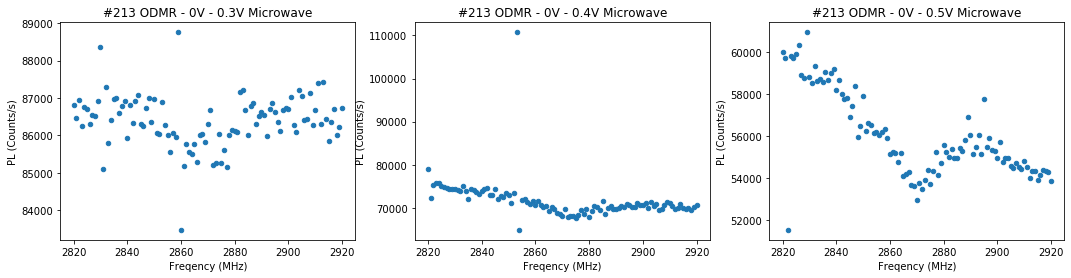

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))  # 1 row, 2 columns

df_535nm_2p45mW_OMDR_0p3V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.3V Microwave")
df_535nm_2p45mW_OMDR_0p4V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax2, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.4V Microwave")
df_535nm_2p45mW_OMDR_0p5V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax3, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.5V Microwave")

Let's remove the massive outlier at 0.4M microwave amplitude

In [14]:
# take out rows for which PL Counts are below 90k
df_535nm_2p45mW_OMDR_0p4V = df_535nm_2p45mW_OMDR_0p4V.loc[df_535nm_2p45mW_OMDR_0p4V['PL (Counts/s)'] < 90000,:]

# regroup group with new df
dfs_535nm_2p45mW_ODMR_VAR_AMP = [
	df_535nm_2p45mW_OMDR_0p3V,
	df_535nm_2p45mW_OMDR_0p4V,
	df_535nm_2p45mW_OMDR_0p5V
]

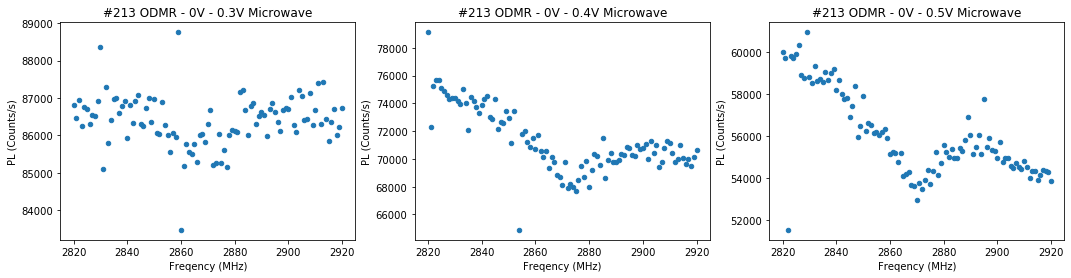

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))  # 1 row, 2 columns

df_535nm_2p45mW_OMDR_0p3V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.3V Microwave")
df_535nm_2p45mW_OMDR_0p4V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax2, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.4V Microwave")
df_535nm_2p45mW_OMDR_0p5V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax3, title=f"#{SAMPLE_NUMBER} ODMR - 0V - 0.5V Microwave")

Let's plot all of these on the same graph

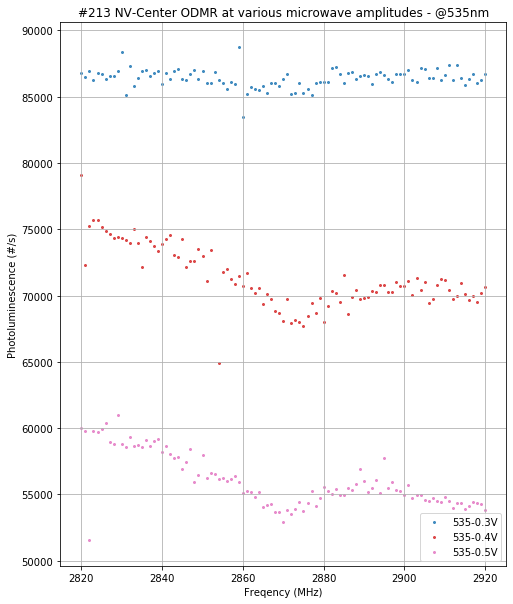

In [63]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,10))  # 1 row, 2 columns

l = len(dfs_535nm_2p45mW_ODMR_VAR_AMP)
plasma = cm.get_cmap('tab10', 4)
colors = plasma(range(4))

for ii, df in enumerate(dfs_535nm_2p45mW_ODMR_VAR_AMP):

	x = df['Freqency (MHz)'].to_numpy()
	y = df['PL (Counts/s)'].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_ample = df['Microwave Amp (V)'][0]

	ax1.scatter(x, y, s=4, c=[colors[ii]], label=f'{wavelength}-{mwave_ample}V', alpha=0.8)

ax1.set_title(f"#{SAMPLE_NUMBER} NV-Center ODMR at various microwave amplitudes - @{wavelength}nm")
ax1.set_xlabel("Freqency (MHz)")
ax1.set_ylabel("Photoluminescence (#/s)")
ax1.legend()
ax1.grid(True)

Notes & Discussion:
- These data samples were obtained from the total of **ten** successive scans around the expected ODMR resonance frequency.
- At 0.3V amplitude, there's no ODMR dip to be seen.
- The ODMR dip widens as the amplitude increases, which is in accordance with expectations.
- The ODMR spectrum seems slightly tilted: a higher PL is observed at lower frequencies than at higher frequencies. We believe this is due to sample drifting, which results from Lorentz forces (orginiating from the applied microwave) acting on the sample. As the sample is being scanned over 10 successive scans, the sample drifts slightly, and thus less and less PL is observed overal. **But why is it lower at a higher frequency?**

Let's sum over the frequency range to compare the totale PL count

In [64]:
dfs_535nm_2p45mW_ODMR_VAR_AMP[0]['PL (Counts/s)'].sum()

8725681.7

In [65]:
df_pl_integral = pd.DataFrame()

for ii, df in enumerate(dfs_535nm_2p45mW_ODMR_VAR_AMP):
	s = df['PL (Counts/s)'].sum()
	data = {
		"Microwave Amp (V)": df['Microwave Amp (V)'][0],
		"PL_Total (Counts/s)": s
	}
	df_pl_integral = df_pl_integral.append(data, ignore_index=True)

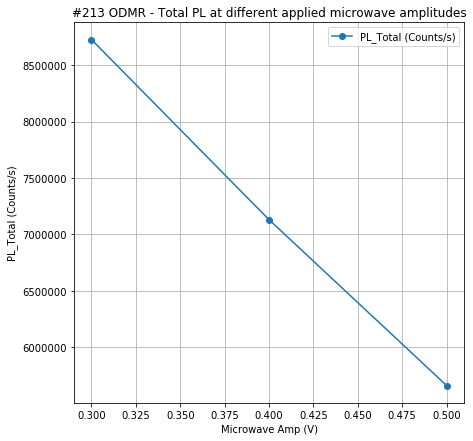

In [66]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,7))  # 1 row, 2 columns

df_pl_integral.plot(x='Microwave Amp (V)', y='PL_Total (Counts/s)', ax=ax1, marker="o", title=f"#{SAMPLE_NUMBER} ODMR - Total PL at different applied microwave amplitudes")

ax1.set_xlabel("Microwave Amp (V)")
ax1.set_ylabel("PL_Total (Counts/s)")
ax1.legend()
ax1.grid(True)

Notes and discussion:
- The PL count seems to drop linearly as applied microwave amplitude increases.



## ODMR At Varrying Applied Voltage

ODMR analysis is being performed, while varrying the applied voltage on the electrodes of the sample. The results are discussed after processing the data

In [67]:
def read_filename(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Freqency (MHz)', 'PL (Counts/s)', '']
	df = df[['Freqency (MHz)', 'PL (Counts/s)']]

	# convert column values to float
	df['Freqency (MHz)'] = df['Freqency (MHz)'].astype(float)
	df['PL (Counts/s)'] = df['PL (Counts/s)'].astype(float)

	return df

In [68]:
df_535nm_2p43mW_OMDR_0V = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-0V.txt')
df_535nm_2p43mW_OMDR_20V_1 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-1.txt')
df_535nm_2p43mW_OMDR_20V_2 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-2.txt')
df_535nm_2p43mW_OMDR_20V_3 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-20V-3.txt')
df_535nm_2p43mW_OMDR_10V_1 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-10V-1.txt')
df_535nm_2p43mW_OMDR_10V_2 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-10V-2.txt')

df_535nm_2p43mW_OMDR_0V['Electrode Voltage (V)'] = 0
df_535nm_2p43mW_OMDR_20V_1['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_20V_2['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_20V_3['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_10V_1['Electrode Voltage (V)'] = 10
df_535nm_2p43mW_OMDR_10V_2['Electrode Voltage (V)'] = 10

dfs = [
	df_535nm_2p43mW_OMDR_0V,
	df_535nm_2p43mW_OMDR_20V_1,
	df_535nm_2p43mW_OMDR_20V_2,
	df_535nm_2p43mW_OMDR_20V_3,
	df_535nm_2p43mW_OMDR_10V_1,
	df_535nm_2p43mW_OMDR_10V_2,
]

for df in dfs:
	df['wavelength'] = 535

Lets plot the 0 wave, then the 10v and then 20v next to each other.

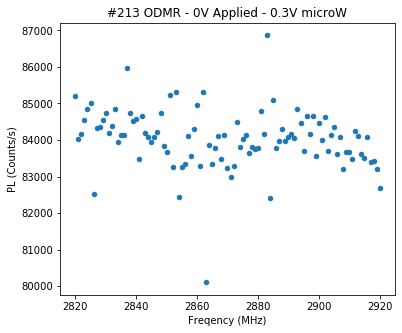

In [69]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,5))  # 1 row, 2 columns

df_535nm_2p43mW_OMDR_0V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"#{SAMPLE_NUMBER} ODMR - 0V Applied - 0.3V microW")

In [70]:
df_535nm_2p43mW_OMDR_0V = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-0V.txt')
df_535nm_2p43mW_OMDR_20V_1 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-1.txt')
df_535nm_2p43mW_OMDR_20V_2 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-2.txt')
df_535nm_2p43mW_OMDR_20V_3 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-20V-3.txt')
df_535nm_2p43mW_OMDR_10V_1 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-10V-1.txt')
df_535nm_2p43mW_OMDR_10V_2 = read_filename('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-10V-2.txt')

df_535nm_2p43mW_OMDR_0V['Electrode Voltage (V)'] = 0
df_535nm_2p43mW_OMDR_0V['Experiment'] = 1

df_535nm_2p43mW_OMDR_20V_1['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_20V_1['Experiment'] = 1
df_535nm_2p43mW_OMDR_20V_2['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_20V_2['Experiment'] = 2
df_535nm_2p43mW_OMDR_20V_3['Electrode Voltage (V)'] = 20
df_535nm_2p43mW_OMDR_20V_3['Experiment'] = 3

df_535nm_2p43mW_OMDR_10V_1['Electrode Voltage (V)'] = 10
df_535nm_2p43mW_OMDR_10V_1['Experiment'] = 1
df_535nm_2p43mW_OMDR_10V_2['Electrode Voltage (V)'] = 10
df_535nm_2p43mW_OMDR_10V_2['Experiment'] = 2

dfs = [
	df_535nm_2p43mW_OMDR_0V,
	df_535nm_2p43mW_OMDR_20V_1,
	df_535nm_2p43mW_OMDR_20V_2,
	df_535nm_2p43mW_OMDR_20V_3,
	df_535nm_2p43mW_OMDR_10V_1,
	df_535nm_2p43mW_OMDR_10V_2,
]

for df in dfs:
	df['wavelength'] = 535

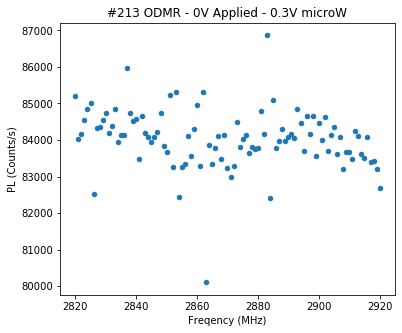

In [71]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,5))  # 1 row, 2 columns

df_535nm_2p43mW_OMDR_0V.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"#{SAMPLE_NUMBER} ODMR - 0V Applied - 0.3V microW")

Text(0.5, 0.98, 'Sample #213 - ODMR - 10V Applied - 0.3V microW')

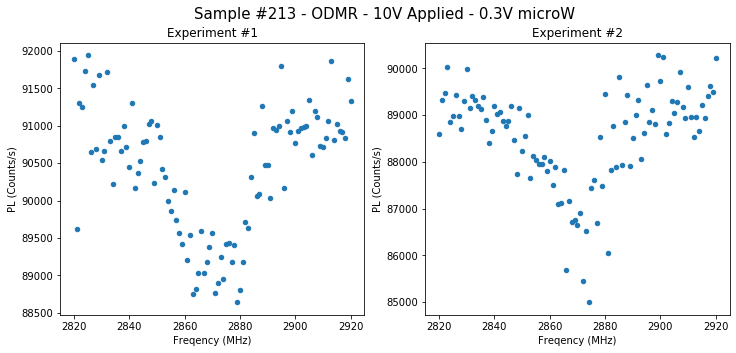

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

df_535nm_2p43mW_OMDR_10V_1.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"Experiment #1")
df_535nm_2p43mW_OMDR_10V_2.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax2, title=f"Experiment #2")

fig.suptitle(f"Sample #{SAMPLE_NUMBER} - ODMR - 10V Applied - 0.3V microW", fontsize=15)

Text(0.5, 0.98, 'Sample #213 - ODMR - 20V Applied - 0.3V microW')

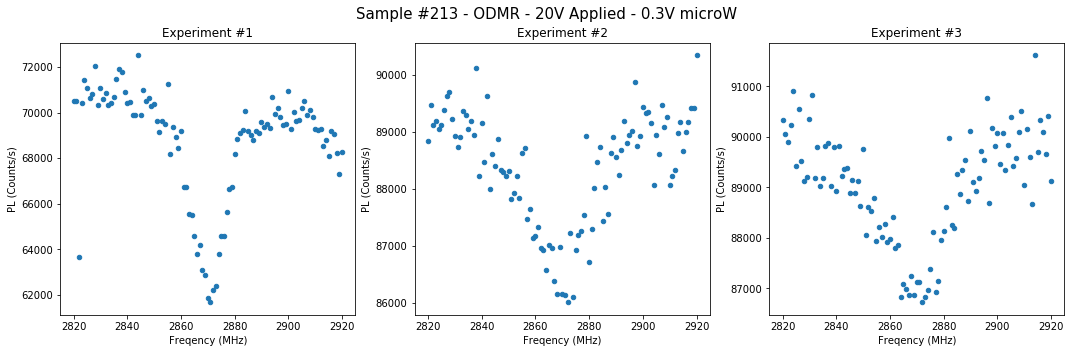

In [73]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,5))  # 1 row, 2 columns

df_535nm_2p43mW_OMDR_20V_1.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax1, title=f"Experiment #1")
df_535nm_2p43mW_OMDR_20V_2.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax2, title=f"Experiment #2")
df_535nm_2p43mW_OMDR_20V_3.plot.scatter(x='Freqency (MHz)', y='PL (Counts/s)', ax=ax3, title=f"Experiment #3")

fig.suptitle(f"Sample #{SAMPLE_NUMBER} - ODMR - 20V Applied - 0.3V microW", fontsize=15)

In [74]:
ti_c_1 = os.stat('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-1.txt').st_birthtime 
ti_c_2 = os.stat('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.43mW-ODMR-20V-2.txt').st_birthtime 
ti_c_3 = os.stat('./MW-PL/NV_9h00/ODMR_VAR_VOLTAGE/535-2.45mW-ODMR-20V-3.txt').st_birthtime 

print (f"Experiment 1 at 20V was done on {time.ctime(ti_c_1)}")
print (f"Experiment 2 at 20V was done on {time.ctime(ti_c_2)}")
print (f"Experiment 3 at 20V was done on {time.ctime(ti_c_3)}")


Experiment 1 at 20V was done on Tue Apr 25 17:08:55 2023
Experiment 2 at 20V was done on Tue Apr 25 17:08:55 2023
Experiment 3 at 20V was done on Tue Apr 25 17:08:55 2023


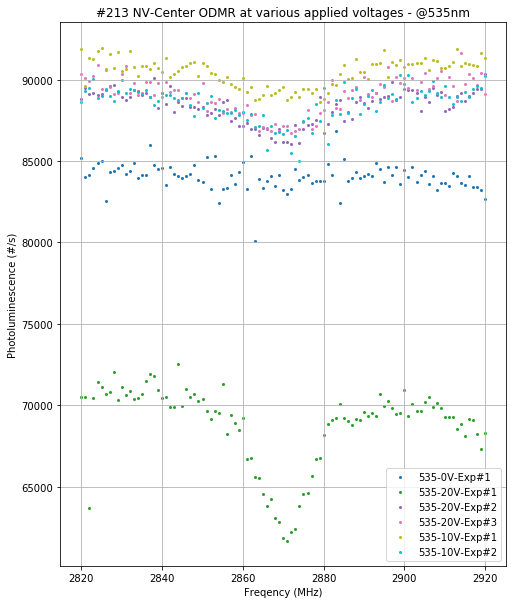

In [75]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,10))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

for ii, df in enumerate(dfs):

	x = df['Freqency (MHz)'].to_numpy()
	y = df['PL (Counts/s)'].to_numpy()
	wavelength = df['wavelength'][0]
	ele_voltage = df['Electrode Voltage (V)'][0]
	experiment = df['Experiment'][0]

	ax1.scatter(x, y, s=4, c=[colors[ii]], label=f'{wavelength}-{ele_voltage}V-Exp#{experiment}', alpha=1)

ax1.set_title(f"#{SAMPLE_NUMBER} NV-Center ODMR at various applied voltages - @{wavelength}nm")
ax1.set_xlabel("Freqency (MHz)")
ax1.set_ylabel("Photoluminescence (#/s)")
ax1.legend()
ax1.grid(True)

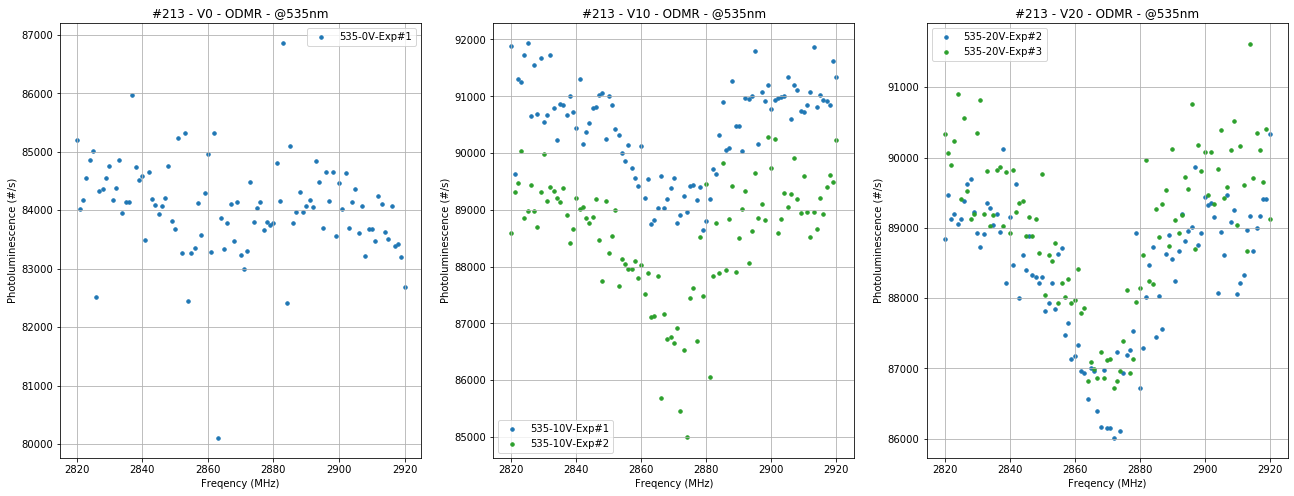

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(22,8))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

v0_dfs = [
	df_535nm_2p43mW_OMDR_0V
]

v10_dfs = [
	df_535nm_2p43mW_OMDR_10V_1,
	df_535nm_2p43mW_OMDR_10V_2
]

v20_dfs = [
	# df_535nm_2p43mW_OMDR_20V_1,
	df_535nm_2p43mW_OMDR_20V_2,
	df_535nm_2p43mW_OMDR_20V_3
]

for ii, df in enumerate(v0_dfs):

	x = df['Freqency (MHz)'].to_numpy()
	y = df['PL (Counts/s)'].to_numpy()
	wavelength = df['wavelength'][0]
	ele_voltage = df['Electrode Voltage (V)'][0]
	experiment = df['Experiment'][0]

	ax1.scatter(x, y, s=12, c=[colors[ii]], label=f'{wavelength}-{ele_voltage}V-Exp#{experiment}', alpha=1)

ax1.set_title(f"#{SAMPLE_NUMBER} - V0 - ODMR - @{wavelength}nm")
ax1.set_xlabel("Freqency (MHz)")
ax1.set_ylabel("Photoluminescence (#/s)")
ax1.legend()
ax1.grid(True)

# for v10 -> plot on ax2
for ii, df in enumerate(v10_dfs):

	x = df['Freqency (MHz)'].to_numpy()
	y = df['PL (Counts/s)'].to_numpy()
	wavelength = df['wavelength'][0]
	ele_voltage = df['Electrode Voltage (V)'][0]
	experiment = df['Experiment'][0]

	ax2.scatter(x, y, s=12, c=[colors[ii]], label=f'{wavelength}-{ele_voltage}V-Exp#{experiment}', alpha=1)

ax2.set_title(f"#{SAMPLE_NUMBER} - V10 - ODMR - @{wavelength}nm")
ax2.set_xlabel("Freqency (MHz)")
ax2.set_ylabel("Photoluminescence (#/s)")
ax2.legend()
ax2.grid(True)

# for v20 -> plot on ax3
for ii, df in enumerate(v20_dfs):

	x = df['Freqency (MHz)'].to_numpy()
	y = df['PL (Counts/s)'].to_numpy()
	wavelength = df['wavelength'][0]
	ele_voltage = df['Electrode Voltage (V)'][0]
	experiment = df['Experiment'][0]

	ax3.scatter(x, y, s=12, c=[colors[ii]], label=f'{wavelength}-{ele_voltage}V-Exp#{experiment}', alpha=1)

ax3.set_title(f"#{SAMPLE_NUMBER} - V20 - ODMR - @{wavelength}nm")
ax3.set_xlabel("Freqency (MHz)")
ax3.set_ylabel("Photoluminescence (#/s)")
ax3.legend()
ax3.grid(True)

Notes and discussion:
- We're observing a bigger ODMR-dip ata higher voltages.
  - About 2k count drop at V10
  - About 3-5k count drop at V20, though it seems like because of a lack of "target locking" onto a point-defect, we weren't able to reproduce the count drop at which can be observed blue data on the `V20` graph
- We're measuring a resonant frequency (max dip in ODMR spectrum) at `2871MHz`, which will be used in the next experiment.

## Voltage Sweep -> Photocurrent at microwave resonance, and without resonance

We're interested in measuring the photocurrent while sweeping the voltage from -20 to 20.
The microwave is applied at the resonant frequency of `2871MHz`.

In [78]:
def read_filename_v_sweep(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Applied Voltage (V)', 'PC (pA)', '']
	df = df[['Applied Voltage (V)', 'PC (pA)']]

	# convert column values to float
	df['Applied Voltage (V)'] = df['Applied Voltage (V)'].astype(float)
	df['PC (pA)'] = df['PC (pA)'].astype(float)

	return df

In [79]:
# read out interesting files
df_535nm_vsweep_no_mwave = read_filename_v_sweep("./MW-PL/NV_9h00/PHOTOCURRENT_MWAVE/535-2.45mW-PCSWEEP-0.0V-0MHz-1.txt")
df_535nm_vsweep_2871MHz_mwave = read_filename_v_sweep("./MW-PL/NV_9h00/PHOTOCURRENT_MWAVE/535-2.45mW-PCSWEEP-0.4V-2871MHz-1.txt")

df_535nm_vsweep_no_mwave['wavelength'] = 535
df_535nm_vsweep_2871MHz_mwave['wavelength'] = 535

In [80]:
cols = df_535nm_vsweep_no_mwave.columns

Text(0.5, 0.98, 'Sample #213 - PC - Voltage Sweep - At resonant 2871MHz microwave, and without applied microwave')

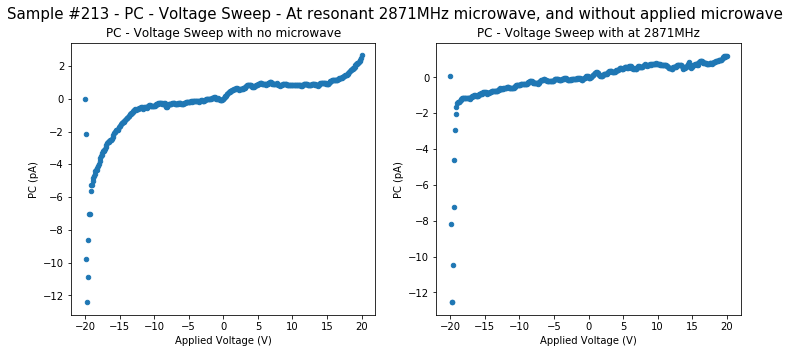

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

cols = df_535nm_vsweep_no_mwave.columns

df_535nm_vsweep_no_mwave.plot.scatter(x=cols[0], y=cols[1], ax=ax1, title=f"PC - Voltage Sweep with no microwave")
df_535nm_vsweep_2871MHz_mwave.plot.scatter(x=cols[0], y=cols[1], ax=ax2, title=f"PC - Voltage Sweep with at 2871MHz")

fig.suptitle(f"Sample #{SAMPLE_NUMBER} - PC - Voltage Sweep - At resonant 2871MHz microwave, and without applied microwave", fontsize=15)

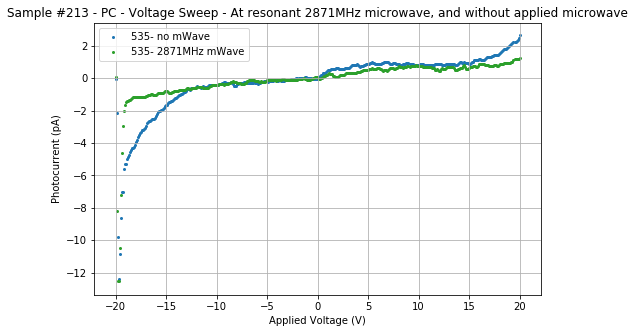

In [83]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,5))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

df = df_535nm_vsweep_no_mwave
x = df[cols[0]].to_numpy()
y = df[cols[1]].to_numpy()
wavelength = df['wavelength'][0]
ax1.scatter(x, y, s=4, c=[colors[0]], label=f'{wavelength}- no mWave', alpha=1)

df = df_535nm_vsweep_2871MHz_mwave
x = df[cols[0]].to_numpy()
y = df[cols[1]].to_numpy()
wavelength = df['wavelength'][0]
ax1.scatter(x, y, s=4, c=[colors[1]], label=f'{wavelength}- 2871MHz mWave', alpha=1)

ax1.set_title(f"Sample #{SAMPLE_NUMBER} - PC - Voltage Sweep - At resonant 2871MHz microwave, and without applied microwave")
ax1.set_xlabel("Applied Voltage (V)")
ax1.set_ylabel("Photocurrent (pA)")
ax1.legend()
ax1.grid(True)

Let's remove outlier that go below `-6Pa` to clean up the graph

In [84]:
df_535nm_vsweep_no_mwave = df_535nm_vsweep_no_mwave.loc[df_535nm_vsweep_no_mwave[cols[1]] > -6, :]
df_535nm_vsweep_2871MHz_mwave = df_535nm_vsweep_2871MHz_mwave.loc[df_535nm_vsweep_2871MHz_mwave[cols[1]] > -6, :]

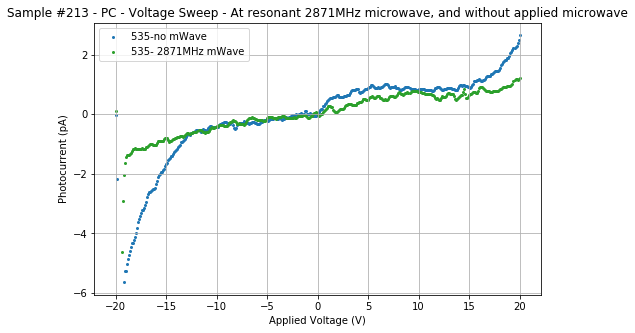

In [86]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,5))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

df = df_535nm_vsweep_no_mwave
x = df[cols[0]].to_numpy()
y = df[cols[1]].to_numpy()
wavelength = df['wavelength'][0]
ax1.scatter(x, y, s=4, c=[colors[0]], label=f'{wavelength}-no mWave', alpha=1)

df = df_535nm_vsweep_2871MHz_mwave
x = df[cols[0]].to_numpy()
y = df[cols[1]].to_numpy()
wavelength = df['wavelength'][0]
ax1.scatter(x, y, s=4, c=[colors[1]], label=f'{wavelength}- 2871MHz mWave', alpha=1)

ax1.set_title(f"Sample #{SAMPLE_NUMBER} - PC - Voltage Sweep - At resonant 2871MHz microwave, and without applied microwave")
ax1.set_xlabel("Applied Voltage (V)")
ax1.set_ylabel("Photocurrent (pA)")
ax1.legend()
ax1.grid(True)

Notes and discussion:
- abc

## VSweep at and around resonant microwave frequency

In this experiment we're interested in measuring photoluminescence (PL) at the resonant frequency.

In [37]:
def read_filename_v_sweep_pl(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Applied Voltage (V)', 'PL (Counts/s)', '']
	df = df[['Applied Voltage (V)', 'PL (Counts/s)']]

	# convert column values to float
	df['Applied Voltage (V)'] = df['Applied Voltage (V)'].astype(float)
	df['PL (Counts/s)'] = df['PL (Counts/s)'].astype(float)

	return df

In [38]:
# read out interesting files
df_535nm_pc_vsweep_0p4V_0mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.4V-0mWAV-2.txt")
df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.4V-2800mWAV-2.txt")
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.4V-2871mWAV-2-i.txt")
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.4V-2871mWAV-2-ii.txt")
df_535nm_pc_vsweep_0p25V_0mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.25V-0mWAV-1.txt")
df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.25V-2800mWAV-1.txt")
df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1 = read_filename_v_sweep_pl("./MW-PL/NV_9h00/VSWEEP_AT_AND_AROUND_RESONANCE_FREQ/535-2.43mW-Vsweep-0.25V-2871mWAV-1.txt")

df_535nm_pc_vsweep_0p4V_0mhz_mmave_1['mWave Amp (V)'] = 0.0
df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1['mWave Amp (V)'] = 0.4
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1['mWave Amp (V)'] = 0.4
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2['mWave Amp (V)'] = 0.4
df_535nm_pc_vsweep_0p25V_0mhz_mmave_1['mWave Amp (V)'] = 0
df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1['mWave Amp (V)'] = 0.25
df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1['mWave Amp (V)'] = 0.25

df_535nm_pc_vsweep_0p4V_0mhz_mmave_1['mWave Freq (MHz)'] = 0.0
df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1['mWave Freq (MHz)'] = 2800
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1['mWave Freq (MHz)'] = 2871
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2['mWave Freq (MHz)'] = 2871
df_535nm_pc_vsweep_0p25V_0mhz_mmave_1['mWave Freq (MHz)'] = 0
df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1['mWave Freq (MHz)'] = 2800
df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1['mWave Freq (MHz)'] = 2871

df_535nm_pc_vsweep_0p4V_0mhz_mmave_1['experiment'] = 1
df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1['experiment'] = 1
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1['experiment'] = 1
df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2['experiment'] = 2
df_535nm_pc_vsweep_0p25V_0mhz_mmave_1['experiment'] = 1
df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1['experiment'] = 1
df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1['experiment'] = 1

dfs = [
	df_535nm_pc_vsweep_0p4V_0mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2,
	df_535nm_pc_vsweep_0p25V_0mhz_mmave_1,
	df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1,
	df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1
]

for df in dfs:
	df['wavelength'] = 535

Lets plot all on the same graph

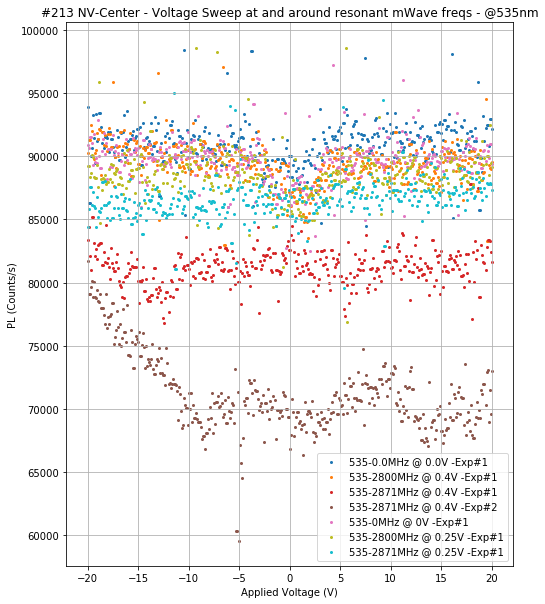

In [39]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,10))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

cols = dfs[0].columns

for ii, df in enumerate(dfs):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax1.scatter(x, y, s=4, c=[colors[ii]], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=1)

ax1.set_title(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs - @{wavelength}nm")
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.legend()
ax1.grid(True)

Too much chaos, so lets group them by mwave amplitude

In [40]:
dfs_v04 = [
	df_535nm_pc_vsweep_0p4V_0mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1,
	df_535nm_pc_vsweep_0p4V_2871mhz_mmave_2,
]

dfs_v025 = [
	df_535nm_pc_vsweep_0p25V_0mhz_mmave_1,
	df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1,
	df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1
]

Text(0.5, 0.98, '#213 NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @535nm')

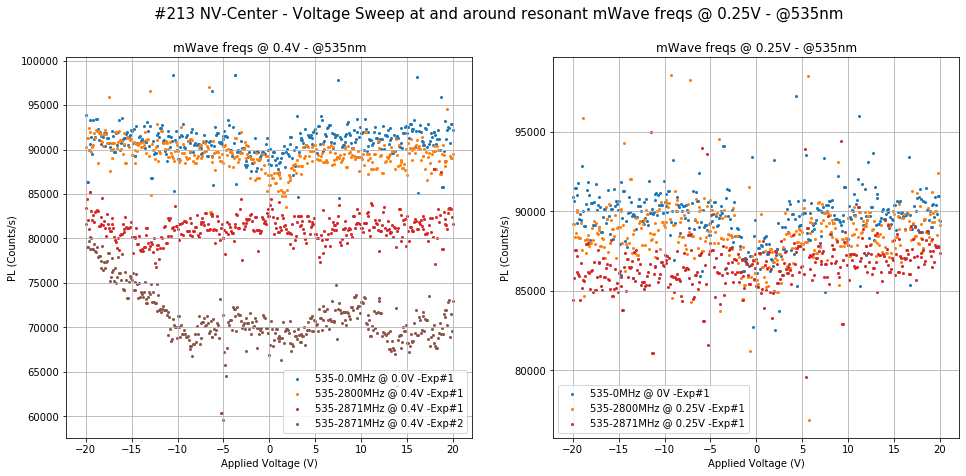

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))  # 1 row, 2 columns

l = len(dfs)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

# for v10 -> plot on ax2
for ii, df in enumerate(dfs_v04):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax1.scatter(x, y, s=4, c=[colors[ii]], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=1)

ax1.set_title(f"mWave freqs @ 0.4V - @{wavelength}nm")
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.legend()
ax1.grid(True)

# for v20 -> plot on ax3
for ii, df in enumerate(dfs_v025):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax2.scatter(x, y, s=4, c=[colors[ii]], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=1)

ax2.set_title(f"mWave freqs @ 0.25V - @{wavelength}nm")
ax2.set_xlabel(cols[0])
ax2.set_ylabel(cols[1])
ax2.legend()
ax2.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @{wavelength}nm", fontsize=15)

Apply smoothing to analyse what's going on

In [42]:
from scipy.signal import savgol_filter

In [43]:
for df in dfs:
	df[cols[1]] = savgol_filter(df[cols[1]], 21, 3) # window size 51, polynomial order 3

Text(0.5, 0.98, '#213 NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @535nm')

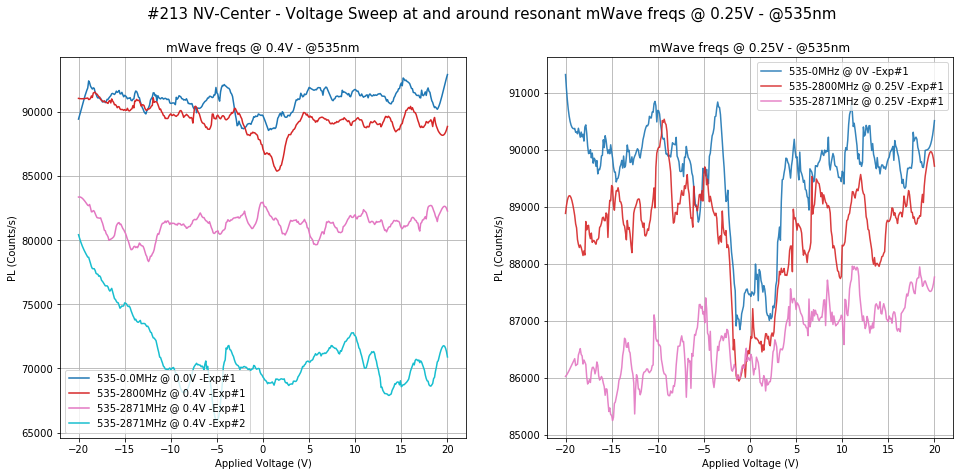

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))  # 1 row, 2 columns

l = len(dfs_v04)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

# for v10 -> plot on ax2
for ii, df in enumerate(dfs_v04):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax1.plot(x, y, c=colors[ii], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=1)

ax1.set_title(f"mWave freqs @ 0.4V - @{wavelength}nm")
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.legend()
ax1.grid(True)

# for v20 -> plot on ax3
for ii, df in enumerate(dfs_v025):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax2.plot(x, y, c=colors[ii], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=0.9)

ax2.set_title(f"mWave freqs @ 0.25V - @{wavelength}nm")
ax2.set_xlabel(cols[0])
ax2.set_ylabel(cols[1])
ax2.legend()
ax2.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @{wavelength}nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @535nm')

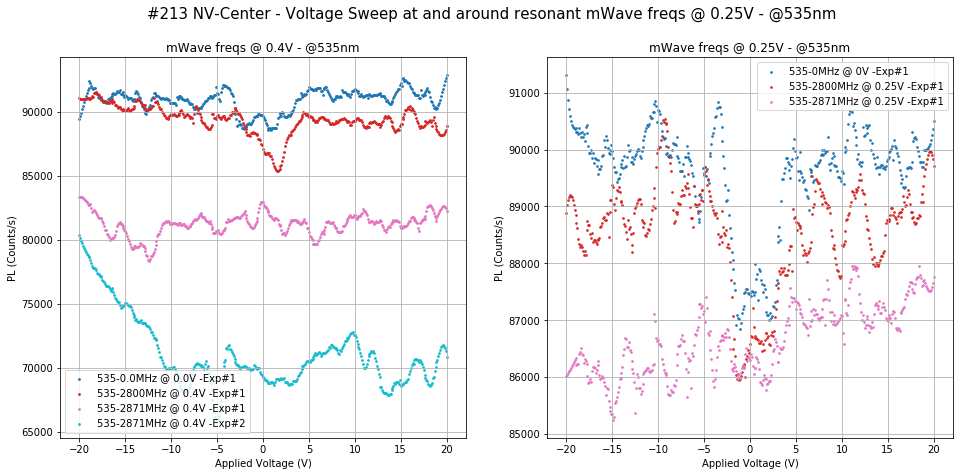

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))  # 1 row, 2 columns

l = len(dfs_v04)
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

# for v10 -> plot on ax2
for ii, df in enumerate(dfs_v04):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax1.scatter(x, y, s=3, c=[colors[ii]], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=1)

ax1.set_title(f"mWave freqs @ 0.4V - @{wavelength}nm")
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.legend()
ax1.grid(True)

# for v20 -> plot on ax3
for ii, df in enumerate(dfs_v025):

	x = df[cols[0]].to_numpy()
	y = df[cols[1]].to_numpy()
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]
	experiment = df['experiment'][0]

	ax2.scatter(x, y, s=3, c=[colors[ii]], label=f'{wavelength}-{mwave_freq}MHz @ {mwave_amp}V -Exp#{experiment}', alpha=0.9)

ax2.set_title(f"mWave freqs @ 0.25V - @{wavelength}nm")
ax2.set_xlabel(cols[0])
ax2.set_ylabel(cols[1])
ax2.legend()
ax2.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @{wavelength}nm", fontsize=15)

Notes and discussion:
- General expectations hold - at the resonant frequency (where ODMR dip is highest), we're measuring a lower PL count throughout. This effect is most pronounced at 0.4V.
  - We're noticing sample drifting, as the PL count is way lower in the second experiment.
  - Question: why do we see an almost linear PL-count drop from `-20V` to `-10V` at the resonance frequency? Why are we not seeing these at 0.25V?
  - Overal, there seems to be no clear correlation between PL and Applied Voltage on the electrodes of our sample.
- At 0.25V we notice a dip in PL between `-5V` and `5V` in the voltage sweep, **which we only see at non-resonant frequencies, or when the micrwave is turned off**
  - We're noticing that there's no PL change between `-5V` and `5V` when applying a resonant microwave frequency. **Can we explain this?**
- We've conducted two experiments at the resonance frequency of `2871Mhz`. We're losing massive PL-counts between the two. We conclude that correct and accurate experiments can only be conducted the moment that we'll implement target-locking on a desired location.


Let's analyse the difference between nMwae, and with mWave

In [46]:
# copy df
df_535nm_pc_vsweep_0p4V_res_no_res = df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1.copy()
df_535nm_pc_vsweep_0p4V_res_no_mwave = df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1.copy()

# Apply PL-transformation: -2871 + 2800
df_535nm_pc_vsweep_0p4V_res_no_res[cols[1]] = -df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1[cols[1]] + df_535nm_pc_vsweep_0p4V_2800mhz_mmave_1[cols[1]]

# Apply PL-transformation: -2871 + 0
df_535nm_pc_vsweep_0p4V_res_no_mwave[cols[1]] = -df_535nm_pc_vsweep_0p4V_2871mhz_mmave_1[cols[1]] + df_535nm_pc_vsweep_0p4V_0mhz_mmave_1[cols[1]]

Text(0.5, 0.98, '#213 NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.4V - @535nm')

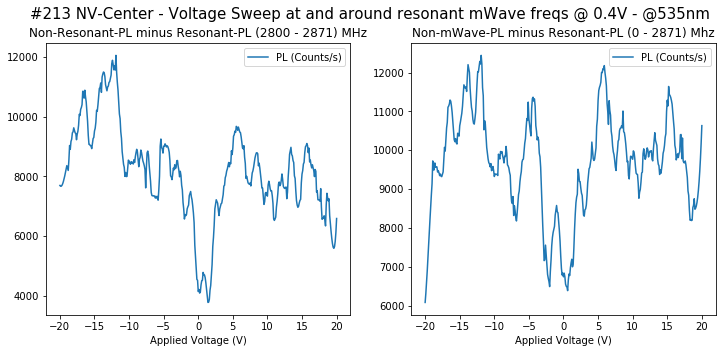

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res.plot(x=cols[0], y=cols[1], ax=ax1, title=f"Non-Resonant-PL minus Resonant-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave.plot(x=cols[0], y=cols[1], ax=ax2, title=f"Non-mWave-PL minus Resonant-PL (0 - 2871) Mhz")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.4V - @{wavelength}nm", fontsize=15)

In [48]:
# copy df
df_535nm_pc_vsweep_0p25V_res_no_res = df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1.copy()
df_535nm_pc_vsweep_0p25V_res_no_mwave = df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1.copy()

# Apply PL-transformation: -2871 + 2800
df_535nm_pc_vsweep_0p25V_res_no_res[cols[1]] = -df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1[cols[1]] + df_535nm_pc_vsweep_0p25V_2800mhz_mmave_1[cols[1]]

# Apply PL-transformation: -2871 + 0
df_535nm_pc_vsweep_0p25V_res_no_mwave[cols[1]] = -df_535nm_pc_vsweep_0p25V_2871mhz_mmave_1[cols[1]] + df_535nm_pc_vsweep_0p25V_0mhz_mmave_1[cols[1]]

Text(0.5, 0.98, '#213 NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @535nm')

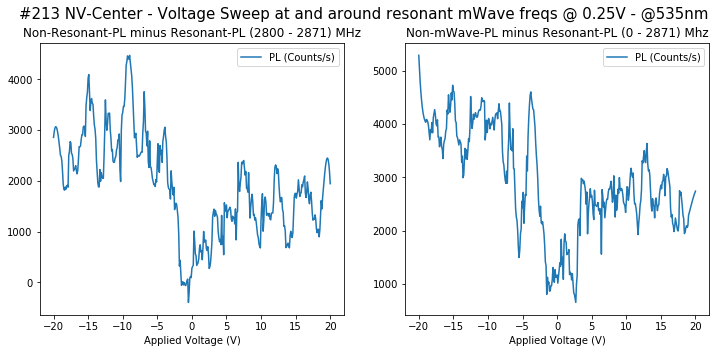

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p25V_res_no_res.columns

df_535nm_pc_vsweep_0p25V_res_no_res.plot(x=cols[0], y=cols[1], ax=ax1, title=f"Non-Resonant-PL minus Resonant-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave.plot(x=cols[0], y=cols[1], ax=ax2, title=f"Non-mWave-PL minus Resonant-PL (0 - 2871) Mhz")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Voltage Sweep at and around resonant mWave freqs @ 0.25V - @{wavelength}nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @535nm')

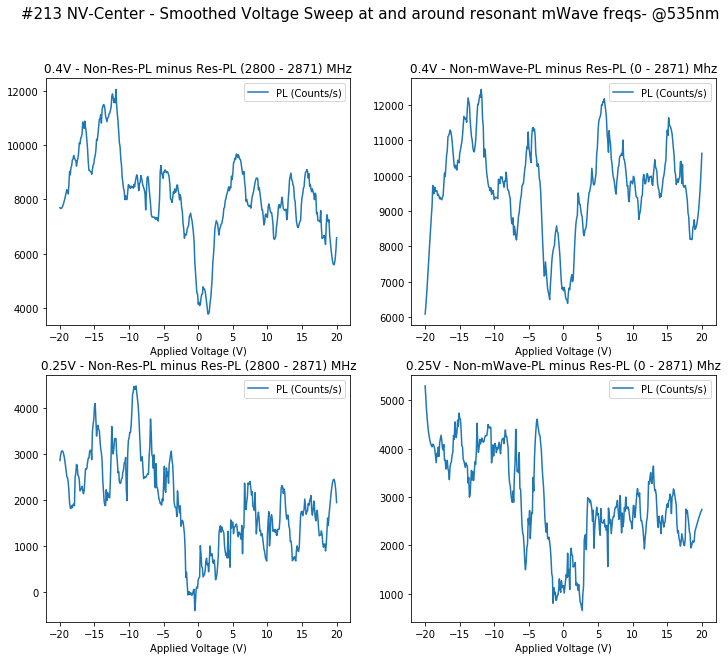

In [50]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res.plot(x=cols[0], y=cols[1], ax=ax1, title=f"0.4V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave.plot(x=cols[0], y=cols[1], ax=ax2, title=f"0.4V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")
df_535nm_pc_vsweep_0p25V_res_no_res.plot(x=cols[0], y=cols[1], ax=ax3, title=f"0.25V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave.plot(x=cols[0], y=cols[1], ax=ax4, title=f"0.25V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @{wavelength}nm", fontsize=15)

Let's apply a `Savitzky-Golay filter` to both datasets, to see overal trends better.

In [51]:
from scipy.signal import savgol_filter

In [52]:
df_535nm_pc_vsweep_0p4V_res_no_res_filtered = df_535nm_pc_vsweep_0p4V_res_no_res.copy()
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered = df_535nm_pc_vsweep_0p4V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p25V_res_no_res_filtered = df_535nm_pc_vsweep_0p25V_res_no_res.copy()
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered = df_535nm_pc_vsweep_0p25V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p4V_res_no_res_filtered[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_res_filtered[cols[1]], 21, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered[cols[1]], 21, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_res_filtered[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_res_filtered[cols[1]], 21, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered[cols[1]], 21, 3) # window size 51, polynomial order 3

df_535nm_pc_vsweep_0p4V_res_no_res_filtered['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered['What'] = '(0 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_res_filtered['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered['What'] = '(0 - 2871)'

Text(0.5, 0.98, '#213 NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @535nm')

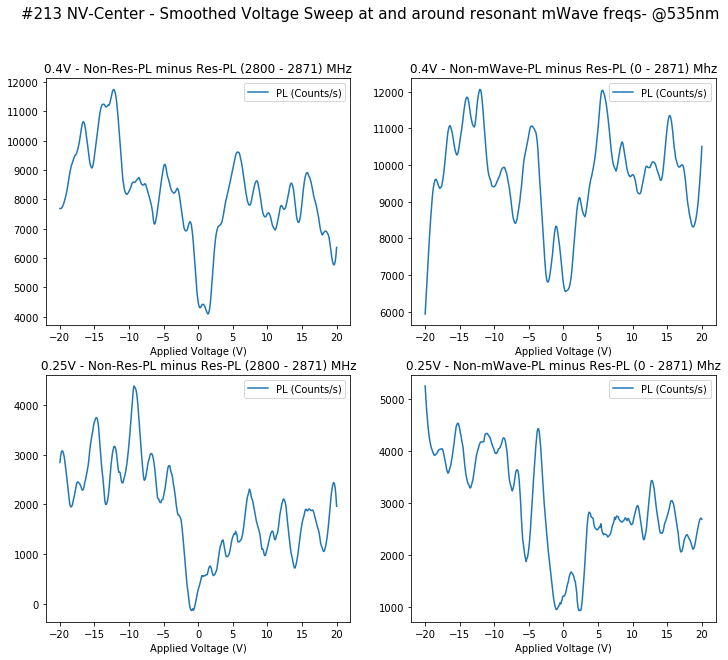

In [53]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res_filtered.plot(x=cols[0], y=cols[1], ax=ax1, title=f"0.4V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered.plot(x=cols[0], y=cols[1], ax=ax2, title=f"0.4V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")
df_535nm_pc_vsweep_0p25V_res_no_res_filtered.plot(x=cols[0], y=cols[1], ax=ax3, title=f"0.25V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered.plot(x=cols[0], y=cols[1], ax=ax4, title=f"0.25V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @{wavelength}nm", fontsize=15)

NameError: name 'T' is not defined

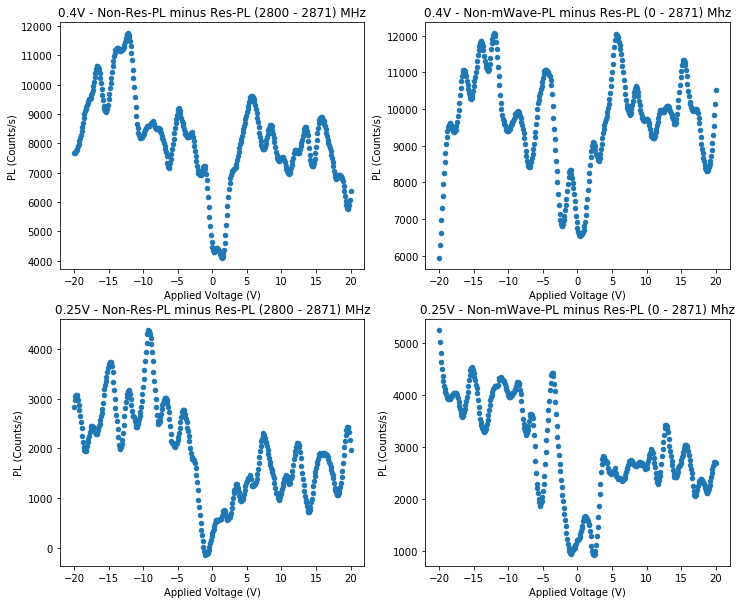

In [54]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res_filtered.plot.scatter(x=cols[0], y=cols[1], ax=ax1, title=f"0.4V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered.plot.scatter(x=cols[0], y=cols[1], ax=ax2, title=f"0.4V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")
df_535nm_pc_vsweep_0p25V_res_no_res_filtered.plot.scatter(x=cols[0], y=cols[1], ax=ax3, title=f"0.25V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered.plot.scatter(x=cols[0], y=cols[1], ax=ax4, title=f"0.25V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")

start, end = ax1.get_xlim()
ax1.set_xticks(np.arange(start, end, 0.5), minor=T)
ax1.legend()
ax1.grid(True)

start, end = ax2.get_xlim()
ax2.set_xticks(np.arange(start, end, 0.5), minor=T)
ax2.legend()
ax2.grid(True)

start, end = ax3.get_xlim()
ax3.set_xticks(np.arange(start, end, 0.5), minor=T)
ax3.legend()
ax3.grid(True)

start, end = ax4.get_xlim()
ax4.set_xticks(np.arange(start, end, 0.5), minor=T)
ax4.legend()
ax4.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @{wavelength}nm", fontsize=15)

So there's some crazy patterning made visible here. How far are these sawtooth lines apart?

To learn more about these evenly spaced peaks, we'll take an FFT.

In [ ]:
from scipy.fftpack import fft, fftfreq

In [ ]:
N = len(df_535nm_pc_vsweep_0p4V_res_no_res_filtered) # number of samples this thing
T = 1/20 # sample rate (we take 20 measurements per voltage)

pl_freq = fft(df_535nm_pc_vsweep_0p4V_res_no_res_filtered[cols[1]])
pl_Int = fftfreq(N, T)[:N//2]

In [ ]:
df_535nm_pc_vsweep_0p25V_res_no_res_filtered.head()

,Applied Voltage (V),PL (Counts/s),mWave Amp (V),mWave Freq (MHz),experiment,wavelength,What
0,-20.0,2841.981089,0.25,2871,1,535,(2800 - 2871)
1,-19.9,2967.526844,0.25,2871,1,535,(2800 - 2871)
2,-19.8,3044.591208,0.25,2871,1,535,(2800 - 2871)
3,-19.7,3078.250321,0.25,2871,1,535,(2800 - 2871)
4,-19.6,3073.580323,0.25,2871,1,535,(2800 - 2871)


/Users/blvck/miniconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '#213 NV-Center - FFT of Voltage PL - @535nm')

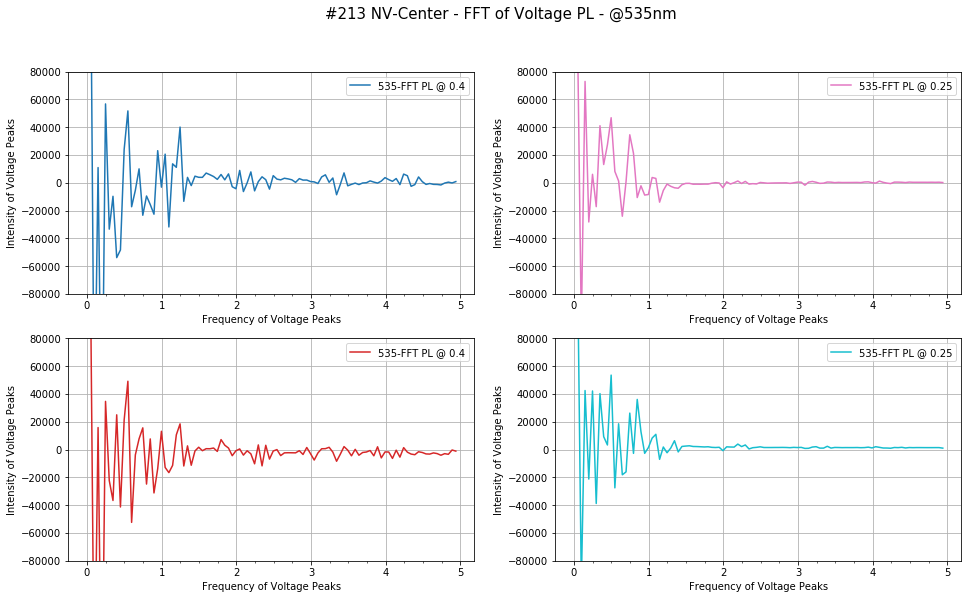

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,9))  # 1 row, 2 columns

l = 4
plasma = cm.get_cmap('tab10',l)
colors = plasma(range(l))

dfs_fft = [
	df_535nm_pc_vsweep_0p4V_res_no_res_filtered,
	df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered,
	df_535nm_pc_vsweep_0p25V_res_no_res_filtered,
	df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered
]

# for v10 -> plot on ax2
for ii, df in enumerate(dfs_fft):

	pl_Int = fft(df[cols[1]])[0:N//4]
	pl_freq = fftfreq(N, T)[0:N//4]
	wavelength = df['wavelength'][0]
	mwave_freq = df['mWave Freq (MHz)'][0]
	mwave_amp = df['mWave Amp (V)'][0]

	axes[ii%2][ii//2].plot(pl_freq, pl_Int, c=colors[ii], label=f'{wavelength}-FFT PL @ {mwave_amp}', alpha=1)

	start, end = axes[ii%2][ii//2].get_xlim()
	axes[ii%2][ii//2].set_xticks(np.arange(0, end, 0.25), minor=T)

	axes[ii%2][ii//2].set_ylim(-80000, 80000)

	axes[ii%2][ii//2].set_xlabel("Frequency of Voltage Peaks")
	axes[ii%2][ii//2].set_ylabel("Intensity of Voltage Peaks")
	axes[ii%2][ii//2].legend()
	axes[ii%2][ii//2].grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - FFT of Voltage PL - @{wavelength}nm", fontsize=15)

Q: Is the sawtooth pattern emerging due to filter, or is truly present in the data, when noise is filtered?
I'll be lowering and increasing the window, and look-out for the pattern.

In [ ]:
df_535nm_pc_vsweep_0p4V_res_no_res_filtered_10 = df_535nm_pc_vsweep_0p4V_res_no_res.copy()
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_10 = df_535nm_pc_vsweep_0p4V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p25V_res_no_res_filtered_10 = df_535nm_pc_vsweep_0p25V_res_no_res.copy()
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_10 = df_535nm_pc_vsweep_0p25V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_10[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_res_filtered_10[cols[1]], 11, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_10[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_10[cols[1]], 11, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_10[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_res_filtered_10[cols[1]], 11, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_10[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_10[cols[1]], 11, 3) # window size 51, polynomial order 3

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_10['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_10['What'] = '(0 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_10['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_10['What'] = '(0 - 2871)'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, '#213 NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @535nm')

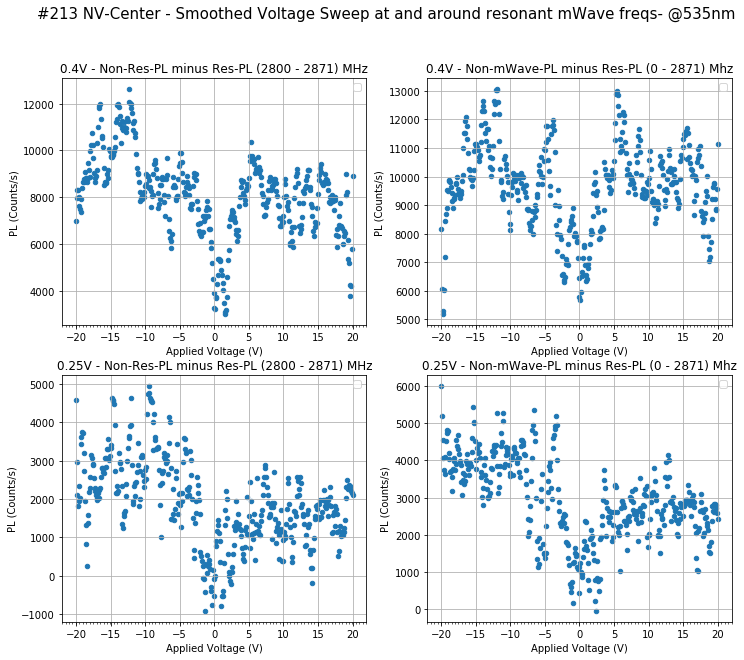

In [ ]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_10.plot.scatter(x=cols[0], y=cols[1], ax=ax1, title=f"0.4V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_10.plot.scatter(x=cols[0], y=cols[1], ax=ax2, title=f"0.4V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_10.plot.scatter(x=cols[0], y=cols[1], ax=ax3, title=f"0.25V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_10.plot.scatter(x=cols[0], y=cols[1], ax=ax4, title=f"0.25V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")

start, end = ax1.get_xlim()
ax1.set_xticks(np.arange(start, end, 0.5), minor=T)
ax1.legend()
ax1.grid(True)

start, end = ax2.get_xlim()
ax2.set_xticks(np.arange(start, end, 0.5), minor=T)
ax2.legend()
ax2.grid(True)

start, end = ax3.get_xlim()
ax3.set_xticks(np.arange(start, end, 0.5), minor=T)
ax3.legend()
ax3.grid(True)

start, end = ax4.get_xlim()
ax4.set_xticks(np.arange(start, end, 0.5), minor=T)
ax4.legend()
ax4.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @{wavelength}nm", fontsize=15)

In [ ]:
df_535nm_pc_vsweep_0p4V_res_no_res_filtered_31 = df_535nm_pc_vsweep_0p4V_res_no_res.copy()
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_31 = df_535nm_pc_vsweep_0p4V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p25V_res_no_res_filtered_31 = df_535nm_pc_vsweep_0p25V_res_no_res.copy()
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_31 = df_535nm_pc_vsweep_0p25V_res_no_mwave.copy()

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_31[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_res_filtered_31[cols[1]], 31, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_31[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_31[cols[1]], 31, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_31[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_res_filtered_31[cols[1]], 31, 3) # window size 51, polynomial order 3
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_31[cols[1]] = \
	savgol_filter(df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_31[cols[1]], 31, 3) # window size 51, polynomial order 3

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_31['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_31['What'] = '(0 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_31['What'] = '(2800 - 2871)'
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_31['What'] = '(0 - 2871)'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, '#213 NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @535nm')

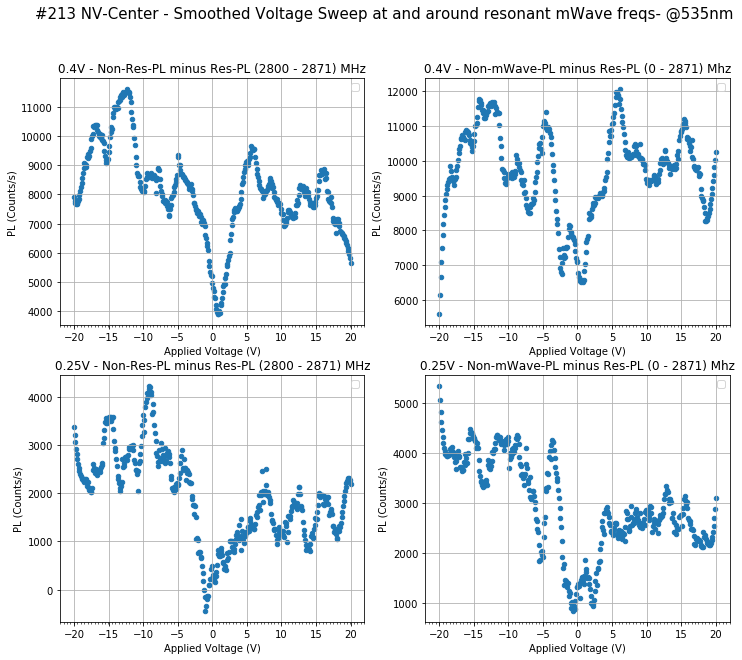

In [ ]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))  # 1 row, 2 columns

cols = df_535nm_pc_vsweep_0p4V_res_no_res.columns

df_535nm_pc_vsweep_0p4V_res_no_res_filtered_31.plot.scatter(x=cols[0], y=cols[1], ax=ax1, title=f"0.4V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p4V_res_no_mwave_filtered_31.plot.scatter(x=cols[0], y=cols[1], ax=ax2, title=f"0.4V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")
df_535nm_pc_vsweep_0p25V_res_no_res_filtered_31.plot.scatter(x=cols[0], y=cols[1], ax=ax3, title=f"0.25V - Non-Res-PL minus Res-PL (2800 - 2871) MHz")
df_535nm_pc_vsweep_0p25V_res_no_mwave_filtered_31.plot.scatter(x=cols[0], y=cols[1], ax=ax4, title=f"0.25V - Non-mWave-PL minus Res-PL (0 - 2871) Mhz")

start, end = ax1.get_xlim()
ax1.set_xticks(np.arange(start, end, 0.5), minor=T)
ax1.legend()
ax1.grid(True)

start, end = ax2.get_xlim()
ax2.set_xticks(np.arange(start, end, 0.5), minor=T)
ax2.legend()
ax2.grid(True)

start, end = ax3.get_xlim()
ax3.set_xticks(np.arange(start, end, 0.5), minor=T)
ax3.legend()
ax3.grid(True)

start, end = ax4.get_xlim()
ax4.set_xticks(np.arange(start, end, 0.5), minor=T)
ax4.legend()
ax4.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Smoothed Voltage Sweep at and around resonant mWave freqs- @{wavelength}nm", fontsize=15)

## V Sweeps at different Laser Power with no Microwave - Another NV Center (15h00)

In [88]:
def read_filename_v_sweep_pl(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Applied Voltage (V)', 'PL (Counts/s)', '']
	df = df[['Applied Voltage (V)', 'PL (Counts/s)']]

	# convert column values to float
	df['Applied Voltage (V)'] = df['Applied Voltage (V)'].astype(float)
	df['PL (Counts/s)'] = df['PL (Counts/s)'].astype(float)

	return df

def read_filename_v_sweep_pc(filename):
	
	# read table
	df = pd.read_csv(filename, sep='\t', decimal='.', header=0)

	# rename columns, and make sure we only keep the two that we're interested in
	df.columns = ['Applied Voltage (V)', 'PC (pA)', '']
	df = df[['Applied Voltage (V)', 'PC (pA)']]

	# convert column values to float
	df['Applied Voltage (V)'] = df['Applied Voltage (V)'].astype(float)
	df['PC (pA)'] = df['PC (pA)'].astype(float)

	return df

In [89]:
df_535nm_pc_vsweep_2p43mW = read_filename_v_sweep_pc("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-2.43mW-PC_VSWEEP-1.txt")
df_535nm_pc_vsweep_2p43mW_bg = read_filename_v_sweep_pc("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-2.43mW-PC_VSWEEP-bg-1.txt")
df_535nm_pc_vsweep_31p5mW = read_filename_v_sweep_pc("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-31.5mW-PC_VSWEEP-1.txt")
df_535nm_pc_vsweep_31p5mW_bg = read_filename_v_sweep_pc("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-31.5mW-PC_VSWEEP-bg-1.txt")

df_535nm_pl_vsweep_2p43mW = read_filename_v_sweep_pl("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-2.43mW-PL_VSWEEP-1.txt")
df_535nm_pl_vsweep_2p43mW_bg = read_filename_v_sweep_pl("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-2.43mW-PL_VSWEEP-bg-1.txt")
df_535nm_pl_vsweep_31p5mW = read_filename_v_sweep_pl("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-31.5mW-PL_VSWEEP-1.txt")
df_535nm_pl_vsweep_31p5mW_bg = read_filename_v_sweep_pl("./MW-PL/NV_15h00/VSWEEPS_NO_MWAVE/535-31.5mW-PL_VSWEEP-bg-1.txt")

cols_pl = df_535nm_pl_vsweep_2p43mW_bg.columns
cols_pc = df_535nm_pc_vsweep_2p43mW_bg.columns

In [90]:
# subtract background from foreground
df_535nm_pc_vsweep_2p43mW[cols_pc[1]] = df_535nm_pc_vsweep_2p43mW[cols_pc[1]] - df_535nm_pc_vsweep_2p43mW_bg[cols_pc[1]]
df_535nm_pc_vsweep_31p5mW[cols_pc[1]] = df_535nm_pc_vsweep_31p5mW[cols_pc[1]] - df_535nm_pc_vsweep_31p5mW_bg[cols_pc[1]]

df_535nm_pl_vsweep_2p43mW[cols_pl[1]] = df_535nm_pl_vsweep_2p43mW[cols_pl[1]] - df_535nm_pl_vsweep_2p43mW_bg[cols_pl[1]]
df_535nm_pl_vsweep_31p5mW[cols_pl[1]] = df_535nm_pl_vsweep_31p5mW[cols_pl[1]] - df_535nm_pl_vsweep_31p5mW_bg[cols_pl[1]]

Text(0.5, 0.98, '#213 NV-Center - PC - Voltage Sweep at different laser powers - no mWave - @535nm')

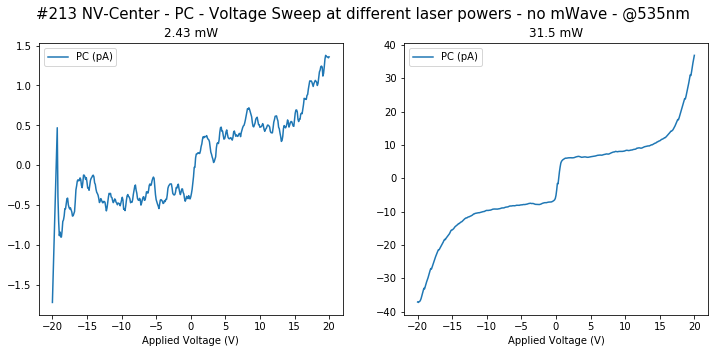

In [91]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_535nm_pc_vsweep_2p43mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax1, title=f"2.43 mW")
df_535nm_pc_vsweep_31p5mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax2, title=f"31.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PC - Voltage Sweep at different laser powers - no mWave - @535nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - PC - Voltage Sweep at different laser powers - no mWave - @535nm')

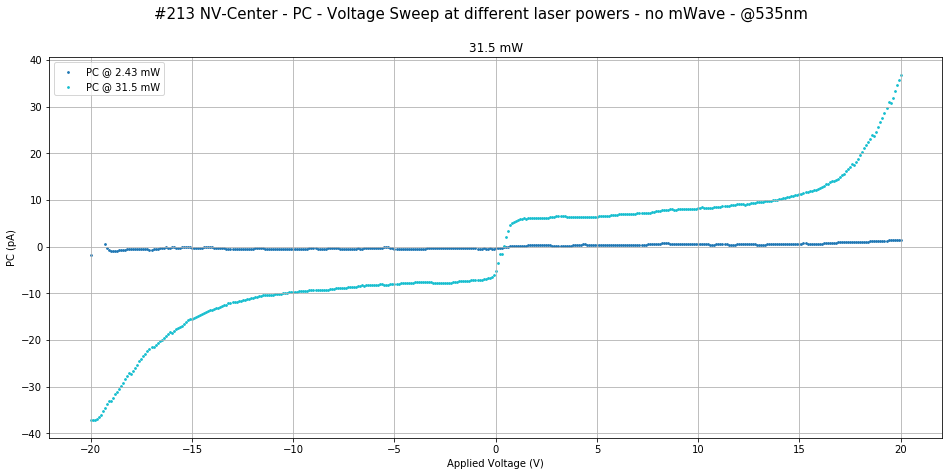

In [92]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,7))  # 1 row, 2 columns

l = 2
plasma = cm.get_cmap('tab10', l)
colors = plasma(range(l))

x = df_535nm_pc_vsweep_2p43mW[cols_pc[0]].to_numpy()
y = df_535nm_pc_vsweep_2p43mW[cols_pc[1]].to_numpy()
wavelength = 435
ax1.scatter(x, y, s=3, c=[colors[0]], label=f'PC @ 2.43 mW', alpha=1)
ax1.set_title(f"2.43 mW")
ax1.set_xlabel(cols_pc[0])
ax1.set_ylabel(cols_pc[1])
ax1.legend()
ax1.grid(True)

x = df_535nm_pc_vsweep_31p5mW[cols_pc[0]].to_numpy()
y = df_535nm_pc_vsweep_31p5mW[cols_pc[1]].to_numpy()
wavelength = 435
ax1.scatter(x, y, s=3, c=[colors[1]], label=f'PC @ 31.5 mW', alpha=1)
ax1.set_title(f"31.5 mW")
ax1.set_xlabel(cols_pc[0])
ax1.set_ylabel(cols_pc[1])
ax1.legend()
ax1.grid(True)

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PC - Voltage Sweep at different laser powers - no mWave - @535nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - PL - Voltage Sweep at different laser powers - no mWave - @535nm')

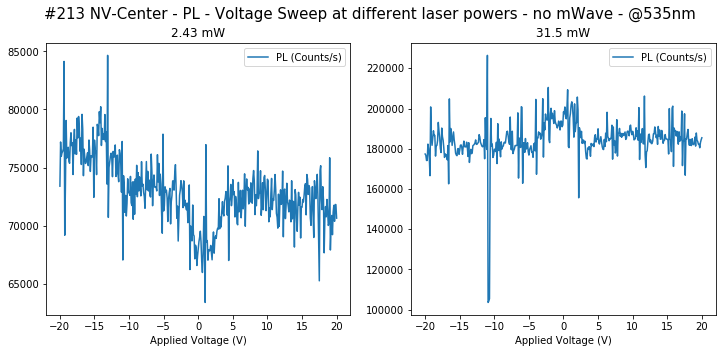

In [93]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_535nm_pl_vsweep_2p43mW.plot(x=cols_pl[0], y=cols_pl[1], ax=ax1, title=f"2.43 mW")
df_535nm_pl_vsweep_31p5mW.plot(x=cols_pl[0], y=cols_pl[1], ax=ax2, title=f"31.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PL - Voltage Sweep at different laser powers - no mWave - @535nm", fontsize=15)

Let's apply smoothing

In [95]:
from scipy.signal import savgol_filter

In [96]:
df_535nm_pl_vsweep_2p43mW_filtered = df_535nm_pl_vsweep_2p43mW.copy()
df_535nm_pl_vsweep_31p5mW_filtered = df_535nm_pl_vsweep_31p5mW.copy()

df_535nm_pl_vsweep_2p43mW_filtered[cols_pl[1]] = savgol_filter(df_535nm_pl_vsweep_2p43mW[cols_pl[1]], 21, 3)
df_535nm_pl_vsweep_31p5mW_filtered[cols_pl[1]] = savgol_filter(df_535nm_pl_vsweep_31p5mW_filtered[cols_pl[1]], 21, 3)

Text(0.5, 0.98, '#213 NV-Center - PL - Smoothed Voltage Sweep - no mWave - @535nm')

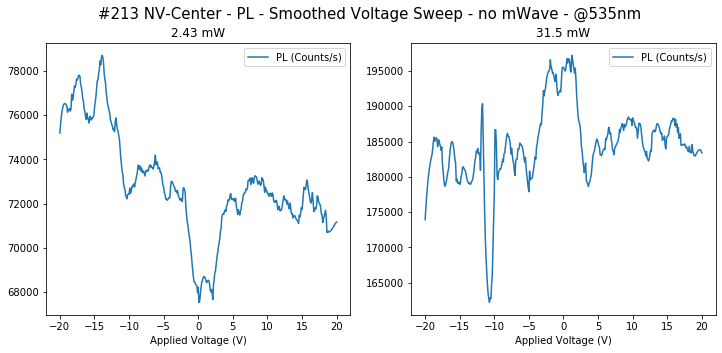

In [97]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_535nm_pl_vsweep_2p43mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax1, title=f"2.43 mW")
df_535nm_pl_vsweep_31p5mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax2, title=f"31.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PL - Smoothed Voltage Sweep - no mWave - @535nm", fontsize=15)

## V Sweeps at different Laser Power with no Microwave - Another NV Center (16h00)

In [98]:
df_2_535nm_pc_vsweep_2p45mW = read_filename_v_sweep_pc("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-2.45mW-PC_VSWEEP-1.txt")
df_2_535nm_pc_vsweep_2p45mW_bg = read_filename_v_sweep_pc("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-2.45mW-PC_VSWEEP-bg-1.txt")
df_2_535nm_pc_vsweep_30p5mW = read_filename_v_sweep_pc("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-30.5mW-PC_VSWEEP-1.txt")
df_2_535nm_pc_vsweep_30p5mW_bg = read_filename_v_sweep_pc("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-30.5mW-PC_VSWEEP-bg-1.txt")

df_2_535nm_pl_vsweep_2p45mW = read_filename_v_sweep_pl("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-2.45mW-PL_VSWEEP-1.txt")
df_2_535nm_pl_vsweep_2p45mW_bg = read_filename_v_sweep_pl("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-2.45mW-PL_VSWEEP-bg-1.txt")
df_2_535nm_pl_vsweep_30p5mW = read_filename_v_sweep_pl("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-30.5mW-PL_VSWEEP-1.txt")
df_2_535nm_pl_vsweep_30p5mW_bg = read_filename_v_sweep_pl("./MW-PL/NV_16h00/VSWEEPS_NO_MWAVE/535-30.5mW-PL_VSWEEP-bg-1.txt")

cols_pc = df_2_535nm_pc_vsweep_2p45mW.columns
cols_pl = df_2_535nm_pl_vsweep_2p45mW.columns

In [99]:
# subtract background from foreground
df_2_535nm_pc_vsweep_2p45mW[cols_pc[1]] = df_2_535nm_pc_vsweep_2p45mW[cols_pc[1]] - df_2_535nm_pc_vsweep_2p45mW_bg[cols_pc[1]]
df_2_535nm_pc_vsweep_30p5mW[cols_pc[1]] = df_2_535nm_pc_vsweep_30p5mW[cols_pc[1]] - df_2_535nm_pc_vsweep_30p5mW_bg[cols_pc[1]]

df_2_535nm_pl_vsweep_2p45mW[cols_pl[1]] = df_2_535nm_pl_vsweep_2p45mW[cols_pl[1]] - df_2_535nm_pl_vsweep_2p45mW_bg[cols_pl[1]]
df_2_535nm_pl_vsweep_30p5mW[cols_pl[1]] = df_2_535nm_pl_vsweep_30p5mW[cols_pl[1]] - df_2_535nm_pl_vsweep_30p5mW_bg[cols_pl[1]]

Text(0.5, 0.98, '#213 NV-Center - Loc 16:00 - PC - Voltage Sweep - no mWave - @535nm')

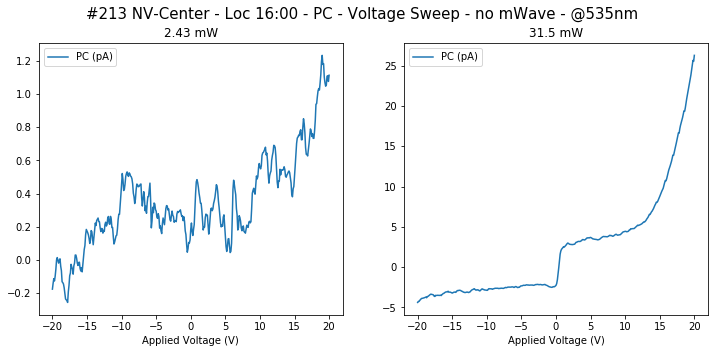

In [100]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_2_535nm_pc_vsweep_2p45mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax1, title=f"2.43 mW")
df_2_535nm_pc_vsweep_30p5mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax2, title=f"31.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Loc 16:00 - PC - Voltage Sweep - no mWave - @535nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - Loc 16:00 - PL - Voltage Sweep at different laser powers - no mWave - @535nm')

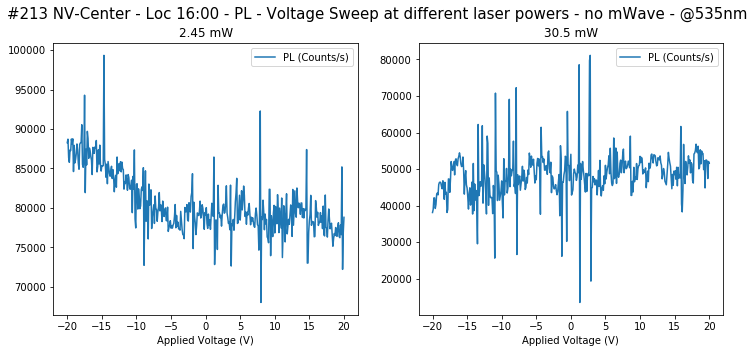

In [101]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_2_535nm_pl_vsweep_2p45mW.plot(x=cols_pl[0], y=cols_pl[1], ax=ax1, title=f"2.45 mW")
df_2_535nm_pl_vsweep_30p5mW.plot(x=cols_pl[0], y=cols_pl[1], ax=ax2, title=f"30.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Loc 16:00 - PL - Voltage Sweep at different laser powers - no mWave - @535nm", fontsize=15)

Apply PL

In [102]:
df_2_535nm_pl_vsweep_2p45mW_filtered = df_2_535nm_pl_vsweep_2p45mW.copy()
df_2_535nm_pl_vsweep_30p5mW_filtered = df_2_535nm_pl_vsweep_30p5mW.copy()

df_2_535nm_pl_vsweep_2p45mW_filtered[cols_pl[1]] = savgol_filter(df_2_535nm_pl_vsweep_2p45mW_filtered[cols_pl[1]], 21, 3)
df_2_535nm_pl_vsweep_30p5mW_filtered[cols_pl[1]] = savgol_filter(df_2_535nm_pl_vsweep_30p5mW_filtered[cols_pl[1]], 21, 3)

Text(0.5, 0.98, '#213 NV-Center - Loc 2 - PL - Smooothed Voltage Sweep - no mWave - @535nm')

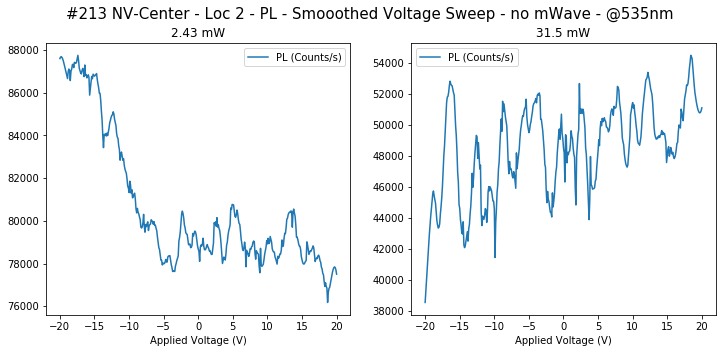

In [103]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_2_535nm_pl_vsweep_2p45mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax1, title=f"2.43 mW")
df_2_535nm_pl_vsweep_30p5mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax2, title=f"31.5 mW")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - Loc 2 - PL - Smooothed Voltage Sweep - no mWave - @535nm", fontsize=15)

Lets render all experiments in 1 frame. PL and PC togethers

Text(0.5, 0.98, '#213 NV-Center - PC - Voltage Sweep - no mWave - @535nm')

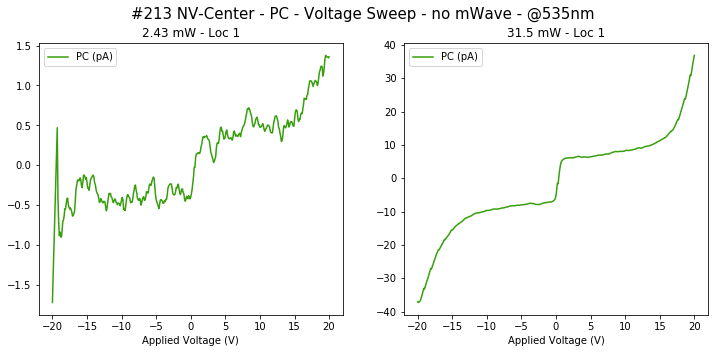

In [118]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns

# df_535nm_pc_vsweep_2p43mW = df_535nm_pc_vsweep_2p43mW.loc[df_535nm_pc_vsweep_2p43mW[cols_pc[1]] < 2,:]

df_535nm_pc_vsweep_2p43mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax1, color="#369F0B", title=f"2.43 mW - Loc 1")
df_535nm_pc_vsweep_31p5mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax2, color="#369F0B", title=f"31.5 mW - Loc 1")
# df_2_535nm_pc_vsweep_2p45mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax3, color="#014AE6", title=f"2.43 mW - Loc 2")
# df_2_535nm_pc_vsweep_30p5mW.plot(x=cols_pc[0], y=cols_pc[1], ax=ax4, color="#014AE6", title=f"31.5 mW - Loc 2")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PC - Voltage Sweep - no mWave - @535nm", fontsize=15)

Text(0.5, 0.98, '#213 NV-Center - PL - Smooothed Voltage Sweep - no mWave - @535nm')

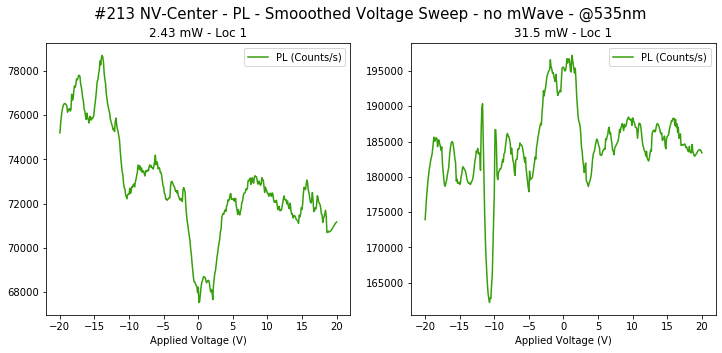

In [112]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

df_535nm_pl_vsweep_2p43mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax1, color="#369F0B", title=f"2.43 mW - Loc 1")
df_535nm_pl_vsweep_31p5mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax2, color="#369F0B", title=f"31.5 mW - Loc 1")
# df_2_535nm_pl_vsweep_2p45mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax3, color="#014AE6", title=f"2.43 mW - Loc 2")
# df_2_535nm_pl_vsweep_30p5mW_filtered.plot(x=cols_pl[0], y=cols_pl[1], ax=ax4, color="#014AE6", title=f"31.5 mW - Loc 2")

fig.suptitle(f"#{SAMPLE_NUMBER} NV-Center - PL - Smooothed Voltage Sweep - no mWave - @535nm", fontsize=15)